# LOADING THE DATA

In [0]:
import numpy as np
import pandas as pd
from google.colab import drive

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score

RANDOM_SEED = 6    # Set a random seed for reproducibility!

drive.mount('/content/drive/')
sns.set()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
train = pd.read_csv('/content/drive/My Drive/Data Sets/ML data/details/train.csv',index_col="tripid")
test  = pd.read_csv('/content/drive/My Drive/Data Sets/ML data/details/test.csv',index_col="tripid")

In [0]:
print("train.shape", train.shape)
train.head()

train.shape (17176, 13)


,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
tripid,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct


In [0]:
test

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
tripid,,,,,,,,,,,,
213284604,10.5,924,42,2.44860,148,2/1/2020 0:38,2/1/2020 0:53,6.83454,79.8750,6.77490,79.8840,289.27
213286352,10.5,4249,20,0.00000,91,2/1/2020 1:02,2/1/2020 2:13,6.91168,79.8723,6.55091,79.9706,1912.70
213293973,10.5,1552,255,2.65880,23,2/1/2020 5:02,2/1/2020 5:28,6.92145,79.8478,6.90539,79.8989,394.00
213294622,10.5,462,16,0.00000,198,2/1/2020 5:30,2/1/2020 5:38,6.77433,79.9416,6.80401,79.9407,154.32
213298687,10.5,814,392,12.36920,69,2/1/2020 7:00,2/1/2020 7:14,6.97968,79.9130,6.98875,79.8914,147.47
...,...,...,...,...,...,...,...,...,...,...,...,...
222856243,10.5,1723,429,24.83332,3,3/16/2020 21:28,3/16/2020 21:56,6.85103,79.9567,6.85588,79.9214,388.48
222857785,10.5,1378,80,0.00000,125,3/16/2020 21:59,3/16/2020 22:22,6.91293,79.9656,6.92112,79.8980,379.85
222858416,10.5,418,56,3.28440,93,3/16/2020 22:02,3/16/2020 22:09,6.85718,79.9081,6.83868,79.9083,112.79


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17176 entries, 189123628 to 213817296
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   additional_fare            16974 non-null  float64
 1   duration                   16974 non-null  float64
 2   meter_waiting              16974 non-null  float64
 3   meter_waiting_fare         16974 non-null  float64
 4   meter_waiting_till_pickup  16974 non-null  float64
 5   pickup_time                17176 non-null  object 
 6   drop_time                  17176 non-null  object 
 7   pick_lat                   17176 non-null  float64
 8   pick_lon                   17176 non-null  float64
 9   drop_lat                   17176 non-null  float64
 10  drop_lon                   17176 non-null  float64
 11  fare                       17039 non-null  float64
 12  label                      17176 non-null  object 
dtypes: float64(10), object(3)
memory u

In [0]:
print("test.shape", test.shape)
test.head()

test.shape (8576, 12)


,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
tripid,,,,,,,,,,,,
213284604,10.5,924,42,2.4486,148,2/1/2020 0:38,2/1/2020 0:53,6.83454,79.8750,6.77490,79.8840,289.27
213286352,10.5,4249,20,0.0000,91,2/1/2020 1:02,2/1/2020 2:13,6.91168,79.8723,6.55091,79.9706,1912.70
213293973,10.5,1552,255,2.6588,23,2/1/2020 5:02,2/1/2020 5:28,6.92145,79.8478,6.90539,79.8989,394.00
213294622,10.5,462,16,0.0000,198,2/1/2020 5:30,2/1/2020 5:38,6.77433,79.9416,6.80401,79.9407,154.32
213298687,10.5,814,392,12.3692,69,2/1/2020 7:00,2/1/2020 7:14,6.97968,79.9130,6.98875,79.8914,147.47


In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8576 entries, 213284604 to 222860703
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   additional_fare            8576 non-null   float64
 1   duration                   8576 non-null   int64  
 2   meter_waiting              8576 non-null   int64  
 3   meter_waiting_fare         8576 non-null   float64
 4   meter_waiting_till_pickup  8576 non-null   int64  
 5   pickup_time                8576 non-null   object 
 6   drop_time                  8576 non-null   object 
 7   pick_lat                   8576 non-null   float64
 8   pick_lon                   8576 non-null   float64
 9   drop_lat                   8576 non-null   float64
 10  drop_lon                   8576 non-null   float64
 11  fare                       8576 non-null   float64
dtypes: float64(7), int64(3), object(2)
memory usage: 871.0+ KB


In [0]:
train.dtypes

additional_fare              float64
duration                     float64
meter_waiting                float64
meter_waiting_fare           float64
meter_waiting_till_pickup    float64
pickup_time                   object
drop_time                     object
pick_lat                     float64
pick_lon                     float64
drop_lat                     float64
drop_lon                     float64
fare                         float64
label                         object
dtype: object

In [0]:
labels = train[["label"]]
print("labels.shape", labels.shape)
labels.head()


labels.shape (17176, 1)


,label
tripid,
189123628,correct
189125358,correct
189125719,correct
189127273,correct
189128020,correct


In [0]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17176 entries, 189123628 to 213817296
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   17176 non-null  object
dtypes: object(1)
memory usage: 268.4+ KB


In [0]:
np.testing.assert_array_equal(train.index.values, labels.index.values)

In [0]:
train.isnull().sum()

additional_fare              202
duration                     202
meter_waiting                202
meter_waiting_fare           202
meter_waiting_till_pickup    202
pickup_time                    0
drop_time                      0
pick_lat                       0
pick_lon                       0
drop_lat                       0
drop_lon                       0
fare                         137
label                          0
dtype: int64

In [0]:
test.isnull().sum()

additional_fare              0
duration                     0
meter_waiting                0
meter_waiting_fare           0
meter_waiting_till_pickup    0
pickup_time                  0
drop_time                    0
pick_lat                     0
pick_lon                     0
drop_lat                     0
drop_lon                     0
fare                         0
dtype: int64

In [0]:
labels.isnull().sum()

label    0
dtype: int64

# EXPLORING THE DATA

## Lables

17176


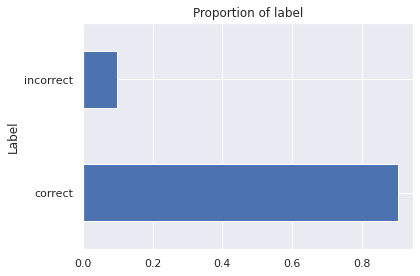

In [0]:
fig, ax = plt.subplots(1, 1, sharex=True)

n_obs = labels.shape[0] #number of rows
print(n_obs)

(labels['label']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of label", ax=ax) 
)
ax.set_ylabel("Label")

fig.tight_layout()


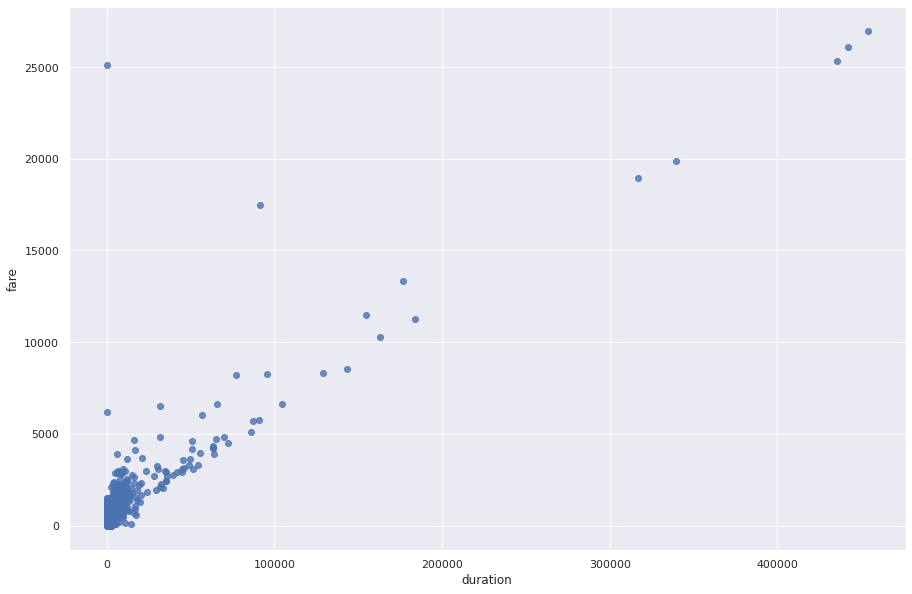

In [0]:
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
ax = sns.regplot(x="duration",y="fare",fit_reg=False,ci=None,truncate=True,data=train)

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17176 entries, 189123628 to 213817296
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   additional_fare            16974 non-null  float64
 1   duration                   16974 non-null  float64
 2   meter_waiting              16974 non-null  float64
 3   meter_waiting_fare         16974 non-null  float64
 4   meter_waiting_till_pickup  16974 non-null  float64
 5   pickup_time                17176 non-null  object 
 6   drop_time                  17176 non-null  object 
 7   pick_lat                   17176 non-null  float64
 8   pick_lon                   17176 non-null  float64
 9   drop_lat                   17176 non-null  float64
 10  drop_lon                   17176 non-null  float64
 11  fare                       17039 non-null  float64
 12  label                      17176 non-null  object 
dtypes: float64(10), object(3)
memory u

In [0]:
train = train.dropna(subset=['duration','fare'])

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16968 entries, 189123628 to 213817296
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   additional_fare            16968 non-null  float64
 1   duration                   16968 non-null  float64
 2   meter_waiting              16968 non-null  float64
 3   meter_waiting_fare         16968 non-null  float64
 4   meter_waiting_till_pickup  16968 non-null  float64
 5   pickup_time                16968 non-null  object 
 6   drop_time                  16968 non-null  object 
 7   pick_lat                   16968 non-null  float64
 8   pick_lon                   16968 non-null  float64
 9   drop_lat                   16968 non-null  float64
 10  drop_lon                   16968 non-null  float64
 11  fare                       16968 non-null  float64
 12  label                      16968 non-null  object 
dtypes: float64(10), object(3)
memory u

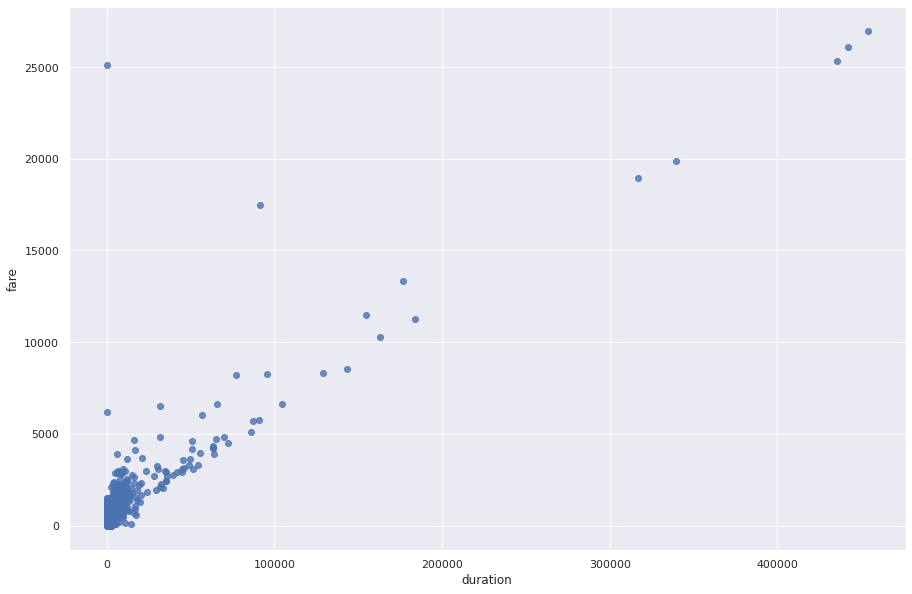

In [0]:
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
ax = sns.regplot(x="duration",y="fare",fit_reg=False,ci=None,truncate=True,data=train)

In [0]:
train.nlargest(5, ['fare'])

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
tripid,,,,,,,,,,,,,
210573839,10.50,453872.0,453650.0,26198.6014,361.0,1/18/2020 10:10,1/23/2020 16:14,6.75240,79.9796,6.67566,79.9210,26945.99,correct
195593822,10.50,442190.0,431741.0,24954.6298,7.0,11/28/2019 12:36,12/3/2019 15:26,6.89518,79.8530,6.92415,79.8628,26098.75,incorrect
192121471,10.50,435397.0,435308.0,25098.4362,39.0,11/15/2019 9:39,11/20/2019 10:35,6.88741,79.8631,6.89370,79.8705,25315.09,incorrect
209365576,12795.03,40.0,210164.0,12252.5612,182.0,1/16/2020 5:29,1/16/2020 5:29,7.15515,79.8718,7.15537,79.8799,25097.59,incorrect
194554416,10.50,339351.0,339312.0,19570.7332,44.0,11/24/2019 11:21,11/28/2019 9:37,6.93536,79.9377,6.91406,79.8894,19865.46,incorrect


**time day**

In [0]:
# import datetime class from datetime module
import datetime
train = train.drop_duplicates(keep='first')

In [0]:
pickup_date_time = train[["pickup_time"]]
print("pickup_date_time.shape", pickup_date_time.shape)
pickup_date_time.head()

pickup_date_time.shape (16965, 1)


,pickup_time
tripid,
189123628,11/1/2019 0:20
189125358,11/1/2019 0:56
189125719,11/1/2019 1:08
189127273,11/1/2019 2:27
189129552,11/1/2019 5:38


In [0]:
drop_date_time = train[["drop_time"]]
print("drop_date_time.shape", drop_date_time.shape)
drop_date_time.head()

drop_date_time.shape (16965, 1)


,drop_time
tripid,
189123628,11/1/2019 0:34
189125358,11/1/2019 1:09
189125719,11/1/2019 1:26
189127273,11/1/2019 2:37
189129552,11/1/2019 6:35


In [0]:
train['pickup_time'] = train['pickup_time'].astype('datetime64[ns]')
train['drop_time'] = train['drop_time'].astype('datetime64[ns]')


train['year'] = train.pickup_time.dt.year

train['month'] = train.pickup_time.dt.month

train['day'] =train.pickup_time.dt.day

train['pickup_hour'] = train.pickup_time.dt.hour

train['pickup_min'] = train.pickup_time.dt.minute

train['drop_hour'] = train.drop_time.dt.hour

train['drop_min'] = train.drop_time.dt.minute




In [0]:
weekDays = (1,2,3,4,5,6,7)
date_name_dict = {}
for ind in train.index:
  year =  train['year'][ind].astype(np.int64)
  month =  train['month'][ind].astype(np.int64)
  day =  train['day'][ind].astype(np.int64)
  date_obj = datetime.date(year,month,day)
  date_Day  = date_obj.weekday()
  dayAsString = weekDays[date_Day]
  date_name_dict[ind] = dayAsString
  


In [0]:
train['weekday'] = train.index.to_series().map(date_name_dict)
train

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,year,month,day,pickup_hour,pickup_min,drop_hour,drop_min,weekday
tripid,,,,,,,,,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.0000,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,correct,2019,11,1,0,20,0,34,5
189125358,10.5,791.0,47.0,0.0000,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,correct,2019,11,1,0,56,1,9,5
189125719,10.5,1087.0,80.0,0.0000,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,correct,2019,11,1,1,8,1,26,5
189127273,10.5,598.0,271.0,15.6638,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,correct,2019,11,1,2,27,2,37,5
189129552,10.5,3407.0,182.0,0.0000,112.0,2019-11-01 05:38:00,2019-11-01 06:35:00,7.13402,79.8969,6.91865,79.8649,1065.02,correct,2019,11,1,5,38,6,35,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213803193,10.5,838.0,93.0,5.4219,451.0,2020-01-31 22:07:00,2020-01-31 22:21:00,7.29073,80.6367,7.28891,80.6557,198.26,correct,2020,1,31,22,7,22,21,5
213812756,10.5,2151.0,428.0,0.0000,39.0,2020-01-31 23:07:00,2020-01-31 23:43:00,6.90569,79.8516,6.95089,79.9389,581.23,correct,2020,1,31,23,7,23,43,5
213813930,10.5,263.0,9.0,0.0000,110.0,2020-01-31 23:21:00,2020-01-31 23:25:00,7.09210,79.9000,7.10135,79.9017,76.20,correct,2020,1,31,23,21,23,25,5


In [0]:
test['pickup_time'] = test['pickup_time'].astype('datetime64[ns]')
test['drop_time'] = test['drop_time'].astype('datetime64[ns]')


test['year'] = test.pickup_time.dt.year

test['month'] = test.pickup_time.dt.month

test['day'] =test.pickup_time.dt.day

test['pickup_hour'] = test.pickup_time.dt.hour

test['pickup_min'] = test.pickup_time.dt.minute

test['drop_hour'] = test.drop_time.dt.hour

test['drop_min'] = test.drop_time.dt.minute

In [0]:
weekDays = (1,2,3,4,5,6,7)
test_date_name_dict = {}
for ind in test.index:
  year =  test['year'][ind].astype(np.int64)
  month =  test['month'][ind].astype(np.int64)
  day =  test['day'][ind].astype(np.int64)
  date_obj = datetime.date(year,month,day)
  date_Day  = date_obj.weekday()
  dayAsString = weekDays[date_Day]
  test_date_name_dict[ind] = dayAsString

In [0]:
test['weekday'] = test.index.to_series().map(test_date_name_dict)
test

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,year,month,day,pickup_hour,pickup_min,drop_hour,drop_min,weekday
tripid,,,,,,,,,,,,,,,,,,,,
213284604,10.5,924,42,2.44860,148,2020-02-01 00:38:00,2020-02-01 00:53:00,6.83454,79.8750,6.77490,79.8840,289.27,2020,2,1,0,38,0,53,6
213286352,10.5,4249,20,0.00000,91,2020-02-01 01:02:00,2020-02-01 02:13:00,6.91168,79.8723,6.55091,79.9706,1912.70,2020,2,1,1,2,2,13,6
213293973,10.5,1552,255,2.65880,23,2020-02-01 05:02:00,2020-02-01 05:28:00,6.92145,79.8478,6.90539,79.8989,394.00,2020,2,1,5,2,5,28,6
213294622,10.5,462,16,0.00000,198,2020-02-01 05:30:00,2020-02-01 05:38:00,6.77433,79.9416,6.80401,79.9407,154.32,2020,2,1,5,30,5,38,6
213298687,10.5,814,392,12.36920,69,2020-02-01 07:00:00,2020-02-01 07:14:00,6.97968,79.9130,6.98875,79.8914,147.47,2020,2,1,7,0,7,14,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222856243,10.5,1723,429,24.83332,3,2020-03-16 21:28:00,2020-03-16 21:56:00,6.85103,79.9567,6.85588,79.9214,388.48,2020,3,16,21,28,21,56,1
222857785,10.5,1378,80,0.00000,125,2020-03-16 21:59:00,2020-03-16 22:22:00,6.91293,79.9656,6.92112,79.8980,379.85,2020,3,16,21,59,22,22,1
222858416,10.5,418,56,3.28440,93,2020-03-16 22:02:00,2020-03-16 22:09:00,6.85718,79.9081,6.83868,79.9083,112.79,2020,3,16,22,2,22,9,1


In [0]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16965 entries, 189123628 to 213817296
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   additional_fare            16965 non-null  float64       
 1   duration                   16965 non-null  float64       
 2   meter_waiting              16965 non-null  float64       
 3   meter_waiting_fare         16965 non-null  float64       
 4   meter_waiting_till_pickup  16965 non-null  float64       
 5   pickup_time                16965 non-null  datetime64[ns]
 6   drop_time                  16965 non-null  datetime64[ns]
 7   pick_lat                   16965 non-null  float64       
 8   pick_lon                   16965 non-null  float64       
 9   drop_lat                   16965 non-null  float64       
 10  drop_lon                   16965 non-null  float64       
 11  fare                       16965 non-null  float64     

**distance**

In [0]:
from math import sin, cos, sqrt, atan2, radians
import geopy.distance


In [0]:
train = train.drop_duplicates(keep='first')

In [0]:
train_distance_dict = {}

for ind in train.index:
  pickup_lat = train['pick_lat'][ind]
  pickup_long = train['pick_lon'][ind]
  drop_lat = train['drop_lat'][ind]
  drop_long = train['drop_lon'][ind]
  coords_1 = (pickup_lat, pickup_long)
  coords_2 = (drop_lat, drop_long)
  distance = geopy.distance.vincenty(coords_1, coords_2).km
  train_distance_dict[ind] = distance





In [0]:
train['distance_val'] = train.index.to_series().map(train_distance_dict)

In [0]:
test_distance_dict = {}

for ind in test.index:
  pickup_lat = test['pick_lat'][ind]
  pickup_long = test['pick_lon'][ind]
  drop_lat = test['drop_lat'][ind]
  drop_long = test['drop_lon'][ind]
  coords_1 = (pickup_lat, pickup_long)
  coords_2 = (drop_lat, drop_long)
  distance = geopy.distance.vincenty(coords_1, coords_2).km
  test_distance_dict[ind] = distance

In [0]:
test['distance_val'] = test.index.to_series().map(test_distance_dict)

**normalize**

In [0]:
train

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,year,month,day,pickup_hour,pickup_min,drop_hour,drop_min,weekday,distance_val
tripid,,,,,,,,,,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.0000,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,correct,2019,11,1,0,20,0,34,5,5.072065
189125358,10.5,791.0,47.0,0.0000,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,correct,2019,11,1,0,56,1,9,5,3.151780
189125719,10.5,1087.0,80.0,0.0000,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,correct,2019,11,1,1,8,1,26,5,6.302418
189127273,10.5,598.0,271.0,15.6638,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,correct,2019,11,1,2,27,2,37,5,0.862654
189129552,10.5,3407.0,182.0,0.0000,112.0,2019-11-01 05:38:00,2019-11-01 06:35:00,7.13402,79.8969,6.91865,79.8649,1065.02,correct,2019,11,1,5,38,6,35,5,24.078955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213803193,10.5,838.0,93.0,5.4219,451.0,2020-01-31 22:07:00,2020-01-31 22:21:00,7.29073,80.6367,7.28891,80.6557,198.26,correct,2020,1,31,22,7,22,21,5,2.107720
213812756,10.5,2151.0,428.0,0.0000,39.0,2020-01-31 23:07:00,2020-01-31 23:43:00,6.90569,79.8516,6.95089,79.9389,581.23,correct,2020,1,31,23,7,23,43,5,10.865770
213813930,10.5,263.0,9.0,0.0000,110.0,2020-01-31 23:21:00,2020-01-31 23:25:00,7.09210,79.9000,7.10135,79.9017,76.20,correct,2020,1,31,23,21,23,25,5,1.040065


In [0]:
test

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,year,month,day,pickup_hour,pickup_min,drop_hour,drop_min,weekday,distance_val
tripid,,,,,,,,,,,,,,,,,,,,,
213284604,10.5,924,42,2.44860,148,2020-02-01 00:38:00,2020-02-01 00:53:00,6.83454,79.8750,6.77490,79.8840,289.27,2020,2,1,0,38,0,53,6,6.670189
213286352,10.5,4249,20,0.00000,91,2020-02-01 01:02:00,2020-02-01 02:13:00,6.91168,79.8723,6.55091,79.9706,1912.70,2020,2,1,1,2,2,13,6,41.351053
213293973,10.5,1552,255,2.65880,23,2020-02-01 05:02:00,2020-02-01 05:28:00,6.92145,79.8478,6.90539,79.8989,394.00,2020,2,1,5,2,5,28,6,5.920044
213294622,10.5,462,16,0.00000,198,2020-02-01 05:30:00,2020-02-01 05:38:00,6.77433,79.9416,6.80401,79.9407,154.32,2020,2,1,5,30,5,38,6,3.283813
213298687,10.5,814,392,12.36920,69,2020-02-01 07:00:00,2020-02-01 07:14:00,6.97968,79.9130,6.98875,79.8914,147.47,2020,2,1,7,0,7,14,6,2.588982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222856243,10.5,1723,429,24.83332,3,2020-03-16 21:28:00,2020-03-16 21:56:00,6.85103,79.9567,6.85588,79.9214,388.48,2020,3,16,21,28,21,56,1,3.938380
222857785,10.5,1378,80,0.00000,125,2020-03-16 21:59:00,2020-03-16 22:22:00,6.91293,79.9656,6.92112,79.8980,379.85,2020,3,16,21,59,22,22,1,7.525493
222858416,10.5,418,56,3.28440,93,2020-03-16 22:02:00,2020-03-16 22:09:00,6.85718,79.9081,6.83868,79.9083,112.79,2020,3,16,22,2,22,9,1,2.046036


In [0]:
train['additional_fare'].value_counts()

10.50       14501
5.00         1209
40.50         336
60.50         271
30.50         268
110.50        109
21.00         102
80.50          38
55.00          21
11.00          21
0.00           14
20.50          14
35.00          14
25.00          11
85.50          11
105.00          5
81.00           4
75.00           3
210.50          2
221.00          2
80.00           2
111.00          1
61.00           1
91.50           1
70.50           1
450.82          1
10.00           1
12795.03        1
Name: additional_fare, dtype: int64

In [0]:
test['additional_fare'].value_counts()

10.5     7753
5.0       488
30.5      270
40.5       36
25.0       10
60.5        6
85.5        4
35.0        3
110.5       3
0.0         2
160.5       1
Name: additional_fare, dtype: int64

In [0]:
print(train['duration'].max())
print(train['duration'].min())

453872.0
0.0


In [0]:
from sklearn import preprocessing

# Set charts to view inline
%matplotlib inline

In [0]:
#x = train[['duration']].values.astype(float)
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
##df_normalized  = pd.DataFrame(x_scaled)
#df_normalized 

In [0]:
train

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,year,month,day,pickup_hour,pickup_min,drop_hour,drop_min,weekday,distance_val
tripid,,,,,,,,,,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.0000,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,correct,2019,11,1,0,20,0,34,5,5.072065
189125358,10.5,791.0,47.0,0.0000,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,correct,2019,11,1,0,56,1,9,5,3.151780
189125719,10.5,1087.0,80.0,0.0000,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,correct,2019,11,1,1,8,1,26,5,6.302418
189127273,10.5,598.0,271.0,15.6638,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,correct,2019,11,1,2,27,2,37,5,0.862654
189129552,10.5,3407.0,182.0,0.0000,112.0,2019-11-01 05:38:00,2019-11-01 06:35:00,7.13402,79.8969,6.91865,79.8649,1065.02,correct,2019,11,1,5,38,6,35,5,24.078955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213803193,10.5,838.0,93.0,5.4219,451.0,2020-01-31 22:07:00,2020-01-31 22:21:00,7.29073,80.6367,7.28891,80.6557,198.26,correct,2020,1,31,22,7,22,21,5,2.107720
213812756,10.5,2151.0,428.0,0.0000,39.0,2020-01-31 23:07:00,2020-01-31 23:43:00,6.90569,79.8516,6.95089,79.9389,581.23,correct,2020,1,31,23,7,23,43,5,10.865770
213813930,10.5,263.0,9.0,0.0000,110.0,2020-01-31 23:21:00,2020-01-31 23:25:00,7.09210,79.9000,7.10135,79.9017,76.20,correct,2020,1,31,23,21,23,25,5,1.040065


In [0]:
df_normalized2=((train["duration"]-train["duration"].min())/(train["duration"].max()-train["duration"].min()))*100
train['duration'] = df_normalized2


In [0]:
df_normalized3=((train["meter_waiting"]-train["meter_waiting"].min())/(train["meter_waiting"].max()-train["meter_waiting"].min()))*400
train['meter_waiting'] = df_normalized3

In [0]:
train

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,year,month,day,pickup_hour,pickup_min,drop_hour,drop_min,weekday,distance_val
tripid,,,,,,,,,,,,,,,,,,,,,,
189123628,10.5,0.183752,0.049377,0.0000,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,correct,2019,11,1,0,20,0,34,5,5.072065
189125358,10.5,0.174278,0.041442,0.0000,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,correct,2019,11,1,0,56,1,9,5,3.151780
189125719,10.5,0.239495,0.070539,0.0000,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,correct,2019,11,1,1,8,1,26,5,6.302418
189127273,10.5,0.131755,0.238951,15.6638,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,correct,2019,11,1,2,27,2,37,5,0.862654
189129552,10.5,0.750652,0.160476,0.0000,112.0,2019-11-01 05:38:00,2019-11-01 06:35:00,7.13402,79.8969,6.91865,79.8649,1065.02,correct,2019,11,1,5,38,6,35,5,24.078955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213803193,10.5,0.184634,0.082002,5.4219,451.0,2020-01-31 22:07:00,2020-01-31 22:21:00,7.29073,80.6367,7.28891,80.6557,198.26,correct,2020,1,31,22,7,22,21,5,2.107720
213812756,10.5,0.473922,0.377383,0.0000,39.0,2020-01-31 23:07:00,2020-01-31 23:43:00,6.90569,79.8516,6.95089,79.9389,581.23,correct,2020,1,31,23,7,23,43,5,10.865770
213813930,10.5,0.057946,0.007936,0.0000,110.0,2020-01-31 23:21:00,2020-01-31 23:25:00,7.09210,79.9000,7.10135,79.9017,76.20,correct,2020,1,31,23,21,23,25,5,1.040065


In [0]:
df_normalized4=((train["meter_waiting_till_pickup"]-train["meter_waiting_till_pickup"].min())/(train["meter_waiting_till_pickup"].max()-train["meter_waiting_till_pickup"].min()))*200
train['meter_waiting_till_pickup'] = df_normalized4

In [0]:
train

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,year,month,day,pickup_hour,pickup_min,drop_hour,drop_min,weekday,distance_val
tripid,,,,,,,,,,,,,,,,,,,,,,
189123628,10.5,0.183752,0.049377,0.0000,0.249571,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,correct,2019,11,1,0,20,0,34,5,5.072065
189125358,10.5,0.174278,0.041442,0.0000,0.522539,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,correct,2019,11,1,0,56,1,9,5,3.151780
189125719,10.5,0.239495,0.070539,0.0000,0.237872,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,correct,2019,11,1,1,8,1,26,5,6.302418
189127273,10.5,0.131755,0.238951,15.6638,0.265169,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,correct,2019,11,1,2,27,2,37,5,0.862654
189129552,10.5,0.750652,0.160476,0.0000,0.436749,2019-11-01 05:38:00,2019-11-01 06:35:00,7.13402,79.8969,6.91865,79.8649,1065.02,correct,2019,11,1,5,38,6,35,5,24.078955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213803193,10.5,0.184634,0.082002,5.4219,1.758696,2020-01-31 22:07:00,2020-01-31 22:21:00,7.29073,80.6367,7.28891,80.6557,198.26,correct,2020,1,31,22,7,22,21,5,2.107720
213812756,10.5,0.473922,0.377383,0.0000,0.152082,2020-01-31 23:07:00,2020-01-31 23:43:00,6.90569,79.8516,6.95089,79.9389,581.23,correct,2020,1,31,23,7,23,43,5,10.865770
213813930,10.5,0.057946,0.007936,0.0000,0.428950,2020-01-31 23:21:00,2020-01-31 23:25:00,7.09210,79.9000,7.10135,79.9017,76.20,correct,2020,1,31,23,21,23,25,5,1.040065


In [0]:
df_normalized8=((train["fare"]-train["fare"].min())/(train["fare"].max()-train["fare"].min()))*50
train['fare'] = df_normalized8

In [0]:
#df_normalized9=((train["distance_val"]-train["distance_val"].min())/(train["distance_val"].max()-train["distance_val"].min()))
#print(train["distance_val"].max())
#print(test["distance_val"].max())

**test normalization**

In [0]:
df_normalized5=((test["duration"]-test["duration"].min())/(test["duration"].max()-test["duration"].min()))*100
test['duration'] = df_normalized5

In [0]:
df_normalized6=((test["meter_waiting"]-test["meter_waiting"].min())/(test["meter_waiting"].max()-test["meter_waiting"].min()))*400
test['meter_waiting'] = df_normalized6

In [0]:
df_normalized7=((test["meter_waiting_till_pickup"]-test["meter_waiting_till_pickup"].min())/(test["meter_waiting_till_pickup"].max()-test["meter_waiting_till_pickup"].min()))*200
test['meter_waiting_till_pickup'] = df_normalized7

In [0]:
df_normalized10=((test["fare"]-test["fare"].min())/(test["fare"].max()-test["fare"].min()))*50
test['fare'] = df_normalized10

In [0]:
test

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,year,month,day,pickup_hour,pickup_min,drop_hour,drop_min,weekday,distance_val
tripid,,,,,,,,,,,,,,,,,,,,,
213284604,10.5,0.206605,0.037589,2.44860,0.532652,2020-02-01 00:38:00,2020-02-01 00:53:00,6.83454,79.8750,6.77490,79.8840,0.538792,2020,2,1,0,38,0,53,6,6.670189
213286352,10.5,0.950070,0.017900,0.00000,0.327509,2020-02-01 01:02:00,2020-02-01 02:13:00,6.91168,79.8723,6.55091,79.9706,3.562577,2020,2,1,1,2,2,13,6,41.351053
213293973,10.5,0.347025,0.228222,2.65880,0.082777,2020-02-01 05:02:00,2020-02-01 05:28:00,6.92145,79.8478,6.90539,79.8989,0.733861,2020,2,1,5,2,5,28,6,5.920044
213294622,10.5,0.103303,0.014320,0.00000,0.712602,2020-02-01 05:30:00,2020-02-01 05:38:00,6.77433,79.9416,6.80401,79.9407,0.287435,2020,2,1,5,30,5,38,6,3.283813
213298687,10.5,0.182009,0.350835,12.36920,0.248331,2020-02-01 07:00:00,2020-02-01 07:14:00,6.97968,79.9130,6.98875,79.8914,0.274676,2020,2,1,7,0,7,14,6,2.588982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222856243,10.5,0.385260,0.383949,24.83332,0.010797,2020-03-16 21:28:00,2020-03-16 21:56:00,6.85103,79.9567,6.85588,79.9214,0.723579,2020,3,16,21,28,21,56,1,3.938380
222857785,10.5,0.308119,0.071599,0.00000,0.449875,2020-03-16 21:59:00,2020-03-16 22:22:00,6.91293,79.9656,6.92112,79.8980,0.707505,2020,3,16,21,59,22,22,1,7.525493
222858416,10.5,0.093464,0.050119,3.28440,0.334707,2020-03-16 22:02:00,2020-03-16 22:09:00,6.85718,79.9081,6.83868,79.9083,0.210082,2020,3,16,22,2,22,9,1,2.046036


In [0]:
#df_normalized11=((test["distance_val"]-test["distance_val"].min())/(test["distance_val"].max()-test["distance_val"].min()))
#df_normalized11

**Model**

In [0]:
train

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,year,month,day,pickup_hour,pickup_min,drop_hour,drop_min,weekday,distance_val
tripid,,,,,,,,,,,,,,,,,,,,,,
189123628,10.5,0.183752,0.049377,0.0000,0.249571,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,0.501596,correct,2019,11,1,0,20,0,34,5,5.072065
189125358,10.5,0.174278,0.041442,0.0000,0.522539,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,0.367123,correct,2019,11,1,0,56,1,9,5,3.151780
189125719,10.5,0.239495,0.070539,0.0000,0.237872,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,0.559712,correct,2019,11,1,1,8,1,26,5,6.302418
189127273,10.5,0.131755,0.238951,15.6638,0.265169,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,0.152713,correct,2019,11,1,2,27,2,37,5,0.862654
189129552,10.5,0.750652,0.160476,0.0000,0.436749,2019-11-01 05:38:00,2019-11-01 06:35:00,7.13402,79.8969,6.91865,79.8649,1.976212,correct,2019,11,1,5,38,6,35,5,24.078955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213803193,10.5,0.184634,0.082002,5.4219,1.758696,2020-01-31 22:07:00,2020-01-31 22:21:00,7.29073,80.6367,7.28891,80.6557,0.367884,correct,2020,1,31,22,7,22,21,5,2.107720
213812756,10.5,0.473922,0.377383,0.0000,0.152082,2020-01-31 23:07:00,2020-01-31 23:43:00,6.90569,79.8516,6.95089,79.9389,1.078509,correct,2020,1,31,23,7,23,43,5,10.865770
213813930,10.5,0.057946,0.007936,0.0000,0.428950,2020-01-31 23:21:00,2020-01-31 23:25:00,7.09210,79.9000,7.10135,79.9017,0.141394,correct,2020,1,31,23,21,23,25,5,1.040065


In [0]:
test

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,year,month,day,pickup_hour,pickup_min,drop_hour,drop_min,weekday,distance_val
tripid,,,,,,,,,,,,,,,,,,,,,
213284604,10.5,0.206605,0.037589,2.44860,0.532652,2020-02-01 00:38:00,2020-02-01 00:53:00,6.83454,79.8750,6.77490,79.8840,0.538792,2020,2,1,0,38,0,53,6,6.670189
213286352,10.5,0.950070,0.017900,0.00000,0.327509,2020-02-01 01:02:00,2020-02-01 02:13:00,6.91168,79.8723,6.55091,79.9706,3.562577,2020,2,1,1,2,2,13,6,41.351053
213293973,10.5,0.347025,0.228222,2.65880,0.082777,2020-02-01 05:02:00,2020-02-01 05:28:00,6.92145,79.8478,6.90539,79.8989,0.733861,2020,2,1,5,2,5,28,6,5.920044
213294622,10.5,0.103303,0.014320,0.00000,0.712602,2020-02-01 05:30:00,2020-02-01 05:38:00,6.77433,79.9416,6.80401,79.9407,0.287435,2020,2,1,5,30,5,38,6,3.283813
213298687,10.5,0.182009,0.350835,12.36920,0.248331,2020-02-01 07:00:00,2020-02-01 07:14:00,6.97968,79.9130,6.98875,79.8914,0.274676,2020,2,1,7,0,7,14,6,2.588982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222856243,10.5,0.385260,0.383949,24.83332,0.010797,2020-03-16 21:28:00,2020-03-16 21:56:00,6.85103,79.9567,6.85588,79.9214,0.723579,2020,3,16,21,28,21,56,1,3.938380
222857785,10.5,0.308119,0.071599,0.00000,0.449875,2020-03-16 21:59:00,2020-03-16 22:22:00,6.91293,79.9656,6.92112,79.8980,0.707505,2020,3,16,21,59,22,22,1,7.525493
222858416,10.5,0.093464,0.050119,3.28440,0.334707,2020-03-16 22:02:00,2020-03-16 22:09:00,6.85718,79.9081,6.83868,79.9083,0.210082,2020,3,16,22,2,22,9,1,2.046036


In [0]:
train_features = train[['additional_fare','duration','meter_waiting','meter_waiting_fare','meter_waiting_till_pickup','fare',
                   'year','month','pickup_hour','pickup_min','drop_hour','drop_min','weekday','distance_val']]
train_features

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,year,month,pickup_hour,pickup_min,drop_hour,drop_min,weekday,distance_val
tripid,,,,,,,,,,,,,,
189123628,10.5,0.183752,0.049377,0.0000,0.249571,0.501596,2019,11,0,20,0,34,5,5.072065
189125358,10.5,0.174278,0.041442,0.0000,0.522539,0.367123,2019,11,0,56,1,9,5,3.151780
189125719,10.5,0.239495,0.070539,0.0000,0.237872,0.559712,2019,11,1,8,1,26,5,6.302418
189127273,10.5,0.131755,0.238951,15.6638,0.265169,0.152713,2019,11,2,27,2,37,5,0.862654
189129552,10.5,0.750652,0.160476,0.0000,0.436749,1.976212,2019,11,5,38,6,35,5,24.078955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213803193,10.5,0.184634,0.082002,5.4219,1.758696,0.367884,2020,1,22,7,22,21,5,2.107720
213812756,10.5,0.473922,0.377383,0.0000,0.152082,1.078509,2020,1,23,7,23,43,5,10.865770
213813930,10.5,0.057946,0.007936,0.0000,0.428950,0.141394,2020,1,23,21,23,25,5,1.040065


In [0]:
train_lable = train[['label']]
#for ind in train_lable.index:
  #if(train_lable['label'][ind]=='correct'):
    #train_lable['label'][ind] = 1
  #elif(train_lable['label'][ind]=='incorrect'):
    #train_lable['label'][ind] = 0
train_lable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16965 entries, 189123628 to 213817296
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   16965 non-null  object
dtypes: object(1)
memory usage: 905.1+ KB


In [0]:
(train_lable.label.values == 0).sum()

0

In [0]:
train_features

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,year,month,pickup_hour,pickup_min,drop_hour,drop_min,weekday,distance_val
tripid,,,,,,,,,,,,,,
189123628,10.5,0.183752,0.049377,0.0000,0.249571,0.501596,2019,11,0,20,0,34,5,5.072065
189125358,10.5,0.174278,0.041442,0.0000,0.522539,0.367123,2019,11,0,56,1,9,5,3.151780
189125719,10.5,0.239495,0.070539,0.0000,0.237872,0.559712,2019,11,1,8,1,26,5,6.302418
189127273,10.5,0.131755,0.238951,15.6638,0.265169,0.152713,2019,11,2,27,2,37,5,0.862654
189129552,10.5,0.750652,0.160476,0.0000,0.436749,1.976212,2019,11,5,38,6,35,5,24.078955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213803193,10.5,0.184634,0.082002,5.4219,1.758696,0.367884,2020,1,22,7,22,21,5,2.107720
213812756,10.5,0.473922,0.377383,0.0000,0.152082,1.078509,2020,1,23,7,23,43,5,10.865770
213813930,10.5,0.057946,0.007936,0.0000,0.428950,0.141394,2020,1,23,21,23,25,5,1.040065


**model**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10,shuffle=True, random_state=0)

In [0]:
clf=KNeighborsClassifier(n_neighbors=13)
scoring = 'accuracy'
score = cross_val_score(clf,train_features,train_lable,cv=k_fold, scoring=scoring)

print(score)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

[0.91278727 0.91632292 0.89746612 0.912198   0.91809075 0.91627358
 0.91804245 0.91273585 0.91745283 0.91509434]


In [0]:
round(np.mean(score)*100, 2)

91.36

In [0]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf,train_features,train_lable,cv=k_fold, scoring=scoring)
print(score)

[0.91868002 0.91396582 0.912198   0.91809075 0.9286977  0.92040094
 0.90978774 0.91273585 0.92747642 0.9245283 ]


In [0]:
# decision tree Score
round(np.mean(score)*100, 2)

91.87

In [0]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf,train_features,train_lable,cv=k_fold, scoring=scoring)
print(score)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

[0.94048321 0.94284031 0.93400118 0.94225103 0.94755451 0.94752358
 0.93926887 0.94339623 0.94870283 0.94752358]


In [0]:
# Random Forest Score
round(np.mean(score)*100, 2)

94.34

In [0]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf,train_features,train_lable,cv=k_fold, scoring=scoring)
print(score)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

[0.90218032 0.90276959 0.89157336 0.90276959 0.92221567 0.91214623
 0.91391509 0.9115566  0.91273585 0.90978774]


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

90.82

In [0]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf,train_features,train_lable,cv=k_fold, scoring=scoring)
print(score)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[0.90748379 0.91750147 0.89687684 0.91337655 0.9169122  0.91627358
 0.91686321 0.91037736 0.91509434 0.91509434]


In [0]:
round(np.mean(score)*100,2)

91.26

**testing**

In [0]:


train_lable

,label
tripid,
189123628,correct
189125358,correct
189125719,correct
189127273,correct
189129552,correct
...,...
213803193,correct
213812756,correct
213813930,correct


In [0]:
clf = RandomForestClassifier(n_estimators=13)
clf.fit(train_features, train_lable)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=13,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

****

In [0]:
#respondent_ids = test.tripid.astype(int)
#test = test.drop(labels=['tripid'], axis=1)

test_features = test[['additional_fare','duration','meter_waiting','meter_waiting_fare','meter_waiting_till_pickup','fare',
                   'year','month','pickup_hour','pickup_min','drop_hour','drop_min','weekday','distance_val']]

In [0]:
test_features

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,year,month,pickup_hour,pickup_min,drop_hour,drop_min,weekday,distance_val
tripid,,,,,,,,,,,,,,
213284604,10.5,0.206605,0.037589,2.44860,0.532652,0.538792,2020,2,0,38,0,53,6,6.670189
213286352,10.5,0.950070,0.017900,0.00000,0.327509,3.562577,2020,2,1,2,2,13,6,41.351053
213293973,10.5,0.347025,0.228222,2.65880,0.082777,0.733861,2020,2,5,2,5,28,6,5.920044
213294622,10.5,0.103303,0.014320,0.00000,0.712602,0.287435,2020,2,5,30,5,38,6,3.283813
213298687,10.5,0.182009,0.350835,12.36920,0.248331,0.274676,2020,2,7,0,7,14,6,2.588982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222856243,10.5,0.385260,0.383949,24.83332,0.010797,0.723579,2020,3,21,28,21,56,1,3.938380
222857785,10.5,0.308119,0.071599,0.00000,0.449875,0.707505,2020,3,21,59,22,22,1,7.525493
222858416,10.5,0.093464,0.050119,3.28440,0.334707,0.210082,2020,3,22,2,22,9,1,2.046036


In [0]:
prediction = clf.predict(test_features)

In [0]:
index=[]
for ind in test.index:
  index.append(ind)

In [0]:
test['tripid'] = index
test

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,year,month,day,pickup_hour,pickup_min,drop_hour,drop_min,weekday,distance_val,tripid
tripid,,,,,,,,,,,,,,,,,,,,,,
213284604,10.5,0.206605,0.037589,2.44860,0.532652,2020-02-01 00:38:00,2020-02-01 00:53:00,6.83454,79.8750,6.77490,79.8840,0.538792,2020,2,1,0,38,0,53,6,6.670189,213284604
213286352,10.5,0.950070,0.017900,0.00000,0.327509,2020-02-01 01:02:00,2020-02-01 02:13:00,6.91168,79.8723,6.55091,79.9706,3.562577,2020,2,1,1,2,2,13,6,41.351053,213286352
213293973,10.5,0.347025,0.228222,2.65880,0.082777,2020-02-01 05:02:00,2020-02-01 05:28:00,6.92145,79.8478,6.90539,79.8989,0.733861,2020,2,1,5,2,5,28,6,5.920044,213293973
213294622,10.5,0.103303,0.014320,0.00000,0.712602,2020-02-01 05:30:00,2020-02-01 05:38:00,6.77433,79.9416,6.80401,79.9407,0.287435,2020,2,1,5,30,5,38,6,3.283813,213294622
213298687,10.5,0.182009,0.350835,12.36920,0.248331,2020-02-01 07:00:00,2020-02-01 07:14:00,6.97968,79.9130,6.98875,79.8914,0.274676,2020,2,1,7,0,7,14,6,2.588982,213298687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222856243,10.5,0.385260,0.383949,24.83332,0.010797,2020-03-16 21:28:00,2020-03-16 21:56:00,6.85103,79.9567,6.85588,79.9214,0.723579,2020,3,16,21,28,21,56,1,3.938380,222856243
222857785,10.5,0.308119,0.071599,0.00000,0.449875,2020-03-16 21:59:00,2020-03-16 22:22:00,6.91293,79.9656,6.92112,79.8980,0.707505,2020,3,16,21,59,22,22,1,7.525493,222857785
222858416,10.5,0.093464,0.050119,3.28440,0.334707,2020-03-16 22:02:00,2020-03-16 22:09:00,6.85718,79.9081,6.83868,79.9083,0.210082,2020,3,16,22,2,22,9,1,2.046036,222858416


In [0]:
submission = pd.DataFrame({
        "tripid": test["tripid"],
        "prediction": prediction
    })

In [0]:
submission = submission.drop(['tripid'],1)

In [0]:
submission

,prediction
tripid,
213284604,correct
213286352,correct
213293973,correct
213294622,correct
213298687,correct
...,...
222856243,correct
222857785,correct
222858416,correct


In [0]:
for ind in submission.index:
  if(submission['prediction'][ind]=='correct'):
    submission['prediction'][ind] = 1
  elif(submission['prediction'][ind]=='incorrect'):
    submission['prediction'][ind] = 0



In [0]:
submission

,prediction
tripid,
213284604,1
213286352,1
213293973,1
213294622,1
213298687,1
...,...
222856243,1
222857785,1
222858416,1


In [0]:
(submission.prediction == 0).sum()


276

In [0]:
(submission.prediction == 1).sum()

8304

In [0]:
DATA_PATH = '/content/drive/My Drive/Data Sets/ML data/output'
sub_path = DATA_PATH + 'sub1.csv'

In [0]:
submission.to_csv(sub_path, index=True)
print('Completed!')

Completed!


score - 0.97320